In [1]:
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import fitzsimon_constants_prepare as c

# Key takeaways:
- Shell represents 0.53 of the readme
- 112 rows have no language stated
- median wordcount is 150, but the top ten languages all had median wordcounts about 50 words more
    - note: this is after cleaning
- 43724 (40k) unique words in the cleaned corpus
- python was not more associated with raspberry pi, but `rasp` shows up a lot (over 500 times)
- median number of unique words was 96
    - again the top ten languages had a median number of unique words that was higher than the overall median

- "install" and "use" represent about 0.03 of the corpus

In [2]:
df_debian = pd.read_json('debian_data.json')
df_debian = df_debian[df_debian.language.notnull()]
df_debian

,repo,language,readme_contents
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...
...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...


In [3]:
df_debian[df_debian.language.isna()].shape

(0, 3)

In [4]:
debian_corpus = ' '.join(df_debian['readme_contents'])
debian_corpus[:100]

'# Packer templates for Debian written in legacy JSON\n\n### Overview\n\nThis repository contains Packer '

In [5]:
debian_corpus_list = c.clean_data(debian_corpus)
pd.Series(debian_corpus_list).value_counts().nlargest(20)

version      2010
imag         1905
support      1672
kernel       1572
docker       1464
updat        1438
1            1368
command      1294
contain      1199
follow       1172
name         1167
bash         1146
see          1142
directori    1112
also         1021
2             994
server        992
sourc         976
requir        967
add           960
dtype: int64

# What are the most common languages for these readmes?

Text(0.5, 1.0, 'Count of languages in dataframe')

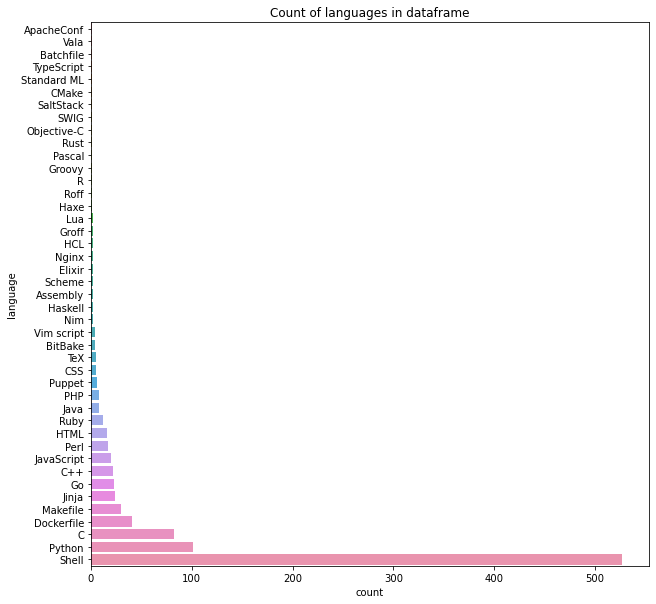

In [6]:
plt.figure(figsize = (10,10))
sns.countplot(data=df_debian, y = 'language', order=df_debian.groupby('language').size().sort_values().index)
plt.title('Count of languages in dataframe')

In [7]:
# ten most common languages
pd.concat([df_debian.language.value_counts(),df_debian.language.value_counts(normalize=True)], axis = 1)

,language,language
Shell,527,0.533401
Python,101,0.102227
C,82,0.082996
Dockerfile,41,0.041498
Makefile,30,0.030364
Jinja,24,0.024291
Go,23,0.023279
C++,22,0.022267
JavaScript,20,0.020243
Perl,17,0.017206


# How long is a typical readme in clean wordcount?

In [8]:
df_debian['length_of_readme'] = df_debian['readme_contents'].apply(lambda r : len(c.clean_data(r)))

<AxesSubplot:>

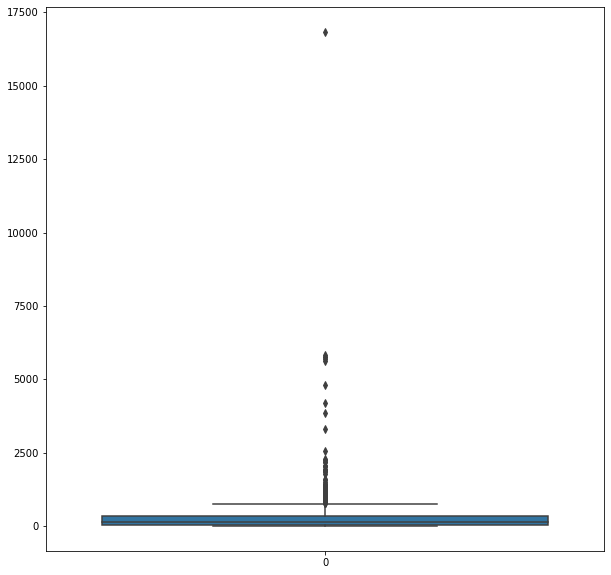

In [9]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df_debian.length_of_readme)

In [10]:
df_debian.length_of_readme.describe()

count      988.000000
mean       324.500000
std        782.531234
min          0.000000
25%         48.000000
50%        137.000000
75%        335.750000
max      16837.000000
Name: length_of_readme, dtype: float64

<AxesSubplot:xlabel='length_of_readme', ylabel='language'>

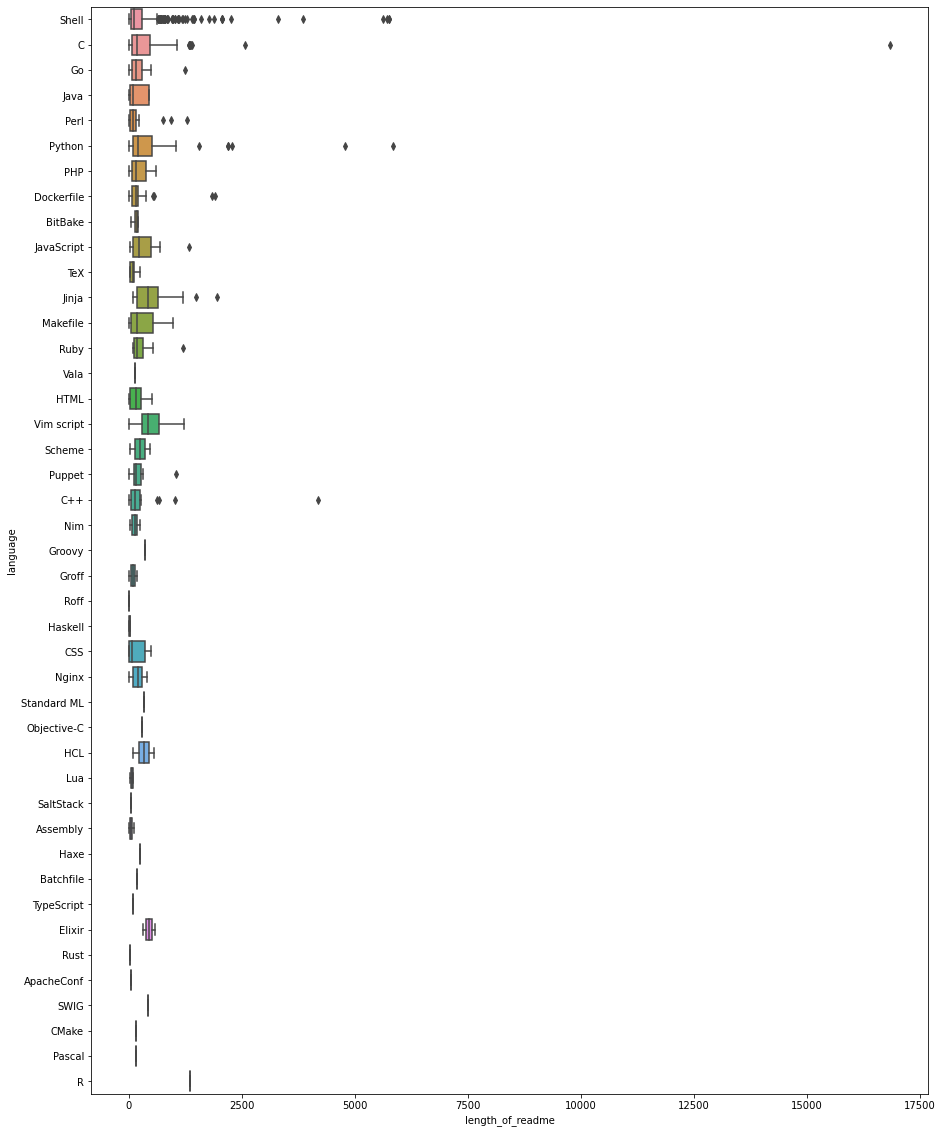

In [11]:
plt.figure(figsize = (15,20))
sns.boxplot(data = df_debian, x = 'length_of_readme', y='language')

In [12]:
sort_column = '50%'
df_debian.groupby('language').length_of_readme.describe().sort_values(sort_column, ascending=False)[sort_column].nlargest(10)

language
R              1360.0
Elixir          450.5
Vim script      431.5
SWIG            419.0
Jinja           410.5
Groovy          346.0
Standard ML     332.0
HCL             325.5
Objective-C     282.0
Scheme          245.5
Name: 50%, dtype: float64

In [13]:
#longest readme is actually a boot program
df_debian[df_debian['length_of_readme'] == 18116]

,repo,language,readme_contents,length_of_readme


In [14]:
#count of repos with no readme
df_debian[df_debian['length_of_readme'] == 0].shape

(44, 4)

# Number of unique words in corpus

In [15]:
debian_corpus_series = pd.Series(debian_corpus_list)
pd.Series(debian_corpus_list).nunique()

40077

In [16]:
pd.Series(debian_corpus_list).value_counts().nlargest(20)

version      2010
imag         1905
support      1672
kernel       1572
docker       1464
updat        1438
1            1368
command      1294
contain      1199
follow       1172
name         1167
bash         1146
see          1142
directori    1112
also         1021
2             994
server        992
sourc         976
requir        967
add           960
dtype: int64

# Python corpus

In [17]:
python_corpus = c.clean_data(' '.join(df_debian[df_debian.language == 'Python'].readme_contents))
python_corpus[:10]

['dhvirtualenv',
 'statu',
 'doc',
 'content',
 'overviewoverview',
 'present',
 'blog',
 'resourcespresentationsblogsotherresourc',
 'dhvirtualenvusingdhvirtualenv',
 'workhowdoesitwork']

In [18]:
pd.Series(python_corpus).value_counts().nlargest(20)

python      395
version     307
download    284
see         268
imag        235
command     222
updat       214
support     211
sourc       202
video       190
zabbix      188
avail       185
also        183
depend      182
exampl      181
name        170
want        166
relea       164
gener       159
test        156
dtype: int64

In [19]:
python_corpus_series = pd.Series(python_corpus)
python_corpus_series[python_corpus_series.str.contains('rasp')].count()

8

In [20]:
debian_corpus_series[debian_corpus_series.str.contains('rasp')].count()

479

# Make a clean readme contents column

In [21]:
df_debian['clean_readme'] = df_debian.readme_contents.apply(c.clean_data)
df_debian

,repo,language,readme_contents,length_of_readme,clean_readme
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...,347,"[packer, templat, written, legaci, json, overv..."
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...,153,"[deepin, wine, deepinwin, ubuntudebian, deepin..."
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...,5754,"[notic, notifi, statement, openfan, termin, co..."
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...,256,"[displaylinkdebian, displaylink, driver, base,..."
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...,50,"[shadowsock, auto, shadowsock, server, shadows..."
...,...,...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...,70,"[broinstal, bro, id, base, compil, broid, pf_r..."
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...,16,"[wget, tar, xzvf, nginx_141origtargz, cd, ngin..."
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...,959,"[pluggabl, authent, modul, pam, univ, 2nd, fac..."
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...,387,"[yubico, univ, 2nd, factor, u2f, server, c, li..."


In [22]:
df_debian['total_unique_words'] = df_debian['clean_readme'].apply(lambda r : pd.Series(r).nunique())
df_debian

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_3898/3822713239.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_debian['total_unique_words'] = df_debian['clean_readme'].apply(lambda r : pd.Series(r).nunique())


,repo,language,readme_contents,length_of_readme,clean_readme,total_unique_words
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...,347,"[packer, templat, written, legaci, json, overv...",202
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...,153,"[deepin, wine, deepinwin, ubuntudebian, deepin...",84
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...,5754,"[notic, notifi, statement, openfan, termin, co...",1619
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...,256,"[displaylinkdebian, displaylink, driver, base,...",165
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...,50,"[shadowsock, auto, shadowsock, server, shadows...",27
...,...,...,...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...,70,"[broinstal, bro, id, base, compil, broid, pf_r...",61
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...,16,"[wget, tar, xzvf, nginx_141origtargz, cd, ngin...",16
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...,959,"[pluggabl, authent, modul, pam, univ, 2nd, fac...",441
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...,387,"[yubico, univ, 2nd, factor, u2f, server, c, li...",224


# distibution of unique words for each language

In [23]:
df_debian.total_unique_words.describe()

count     988.000000
mean      157.959514
std       230.096791
min         0.000000
25%        38.000000
50%        90.000000
75%       196.500000
max      3576.000000
Name: total_unique_words, dtype: float64

In [24]:
df_debian.groupby('language').total_unique_words.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
Shell,527.0,143.043643,211.777522,0.0,33.50,76.0,178.50,2204.0
Python,101.0,203.653465,241.912440,0.0,69.00,122.0,278.00,1625.0
C,82.0,227.524390,421.375444,0.0,52.50,116.0,275.50,3576.0
Dockerfile,41.0,125.536585,166.284410,5.0,46.00,90.0,117.00,859.0
Makefile,30.0,158.666667,144.597022,0.0,33.25,127.5,293.25,499.0
Jinja,24.0,258.541667,181.197701,58.0,117.00,223.5,322.00,753.0
Go,23.0,134.956522,130.106417,0.0,57.00,116.0,178.50,604.0
C++,22.0,183.590909,309.164413,1.0,38.50,103.0,155.25,1447.0
JavaScript,20.0,169.650000,131.017988,12.0,62.75,145.0,261.50,423.0


In [25]:
#max unique words is u-boot for a tinker board
df_debian[df_debian.total_unique_words==3605]

,repo,language,readme_contents,length_of_readme,clean_readme,total_unique_words


<AxesSubplot:>

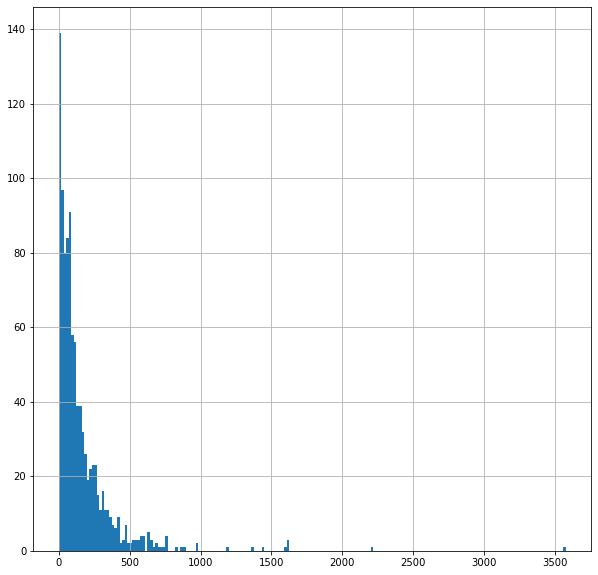

In [26]:
plt.figure(figsize = (10, 10))
df_debian.total_unique_words.hist(bins = 200)

# Most common words and ngrams

In [27]:
pd.concat([debian_corpus_series.value_counts(), debian_corpus_series.value_counts(normalize=True)], axis = 1).head(10)

,0,1
version,2010,0.006270
imag,1905,0.005942
support,1672,0.005216
kernel,1572,0.004904
docker,1464,0.004567
updat,1438,0.004486
1,1368,0.004267
command,1294,0.004036
contain,1199,0.003740
follow,1172,0.003656


In [28]:
keep_languages = df_debian.language.value_counts().nlargest(10).index.tolist()
df_debian.loc[~(df_debian.language.isin(keep_languages)), 'language'] = 'other'

df_debian.language.value_counts()

Shell         527
other         101
Python        101
C              82
Dockerfile     41
Makefile       30
Jinja          24
Go             23
C++            22
JavaScript     20
Perl           17
Name: language, dtype: int64

In [29]:
languages = df_debian.language.unique().tolist()
languages = ['all'] + languages

In [30]:
print(languages)

['all', 'Shell', 'C', 'Go', 'other', 'Perl', 'Python', 'Dockerfile', 'JavaScript', 'Jinja', 'Makefile', 'C++']


In [31]:
corpora = []
corpora.append({'language':'all', 'corpus':debian_corpus_list})
for lang in languages[1:]:
    corpora.append({'language':lang, 'corpus':c.clean_data(' '.join(df_debian[df_debian.language == lang].readme_contents))})

In [32]:
df_corpora = pd.DataFrame(corpora)
df_corpora

,language,corpus
0,all,"[packer, templat, written, legaci, json, overv..."
1,Shell,"[packer, templat, written, legaci, json, overv..."
2,C,"[deepin, wine, deepinwin, ubuntudebian, deepin..."
3,Go,"[aptli, imag, target, imag, target, imag, targ..."
4,other,"[gnurootdebian, repositori, correspond, gnuroo..."
5,Perl,"[note, repo, date, im, histor, reason, one, ol..."
6,Python,"[dhvirtualenv, statu, doc, content, overviewov..."
7,Dockerfile,"[whale, erpnext, docker, statu, goal, repo, st..."
8,JavaScript,"[electron, debianresourceslogopng, electronins..."
9,Jinja,"[debop, logodebopslogo, debianba, data, center..."


In [33]:
corpora_series = []
for corpus in corpora:
    corpora_series.append(pd.Series(corpus['corpus']).value_counts())
    
word_counts = pd.concat(corpora_series, axis = 1)
word_counts = word_counts.set_axis(languages, axis = 1).fillna(0).apply(lambda s: s.astype(int))

In [34]:
word_counts

,all,Shell,C,Go,other,Perl,Python,Dockerfile,JavaScript,Jinja,Makefile,C++
version,2010,974,245,15,121,26,307,129,76,39,48,30
imag,1905,836,400,46,38,0,235,236,7,11,77,19
support,1672,769,355,29,144,8,211,41,30,25,33,27
kernel,1572,783,659,9,15,12,55,8,6,8,10,7
docker,1464,880,14,63,12,0,66,304,16,52,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...
patcheslinuxconfig,1,0,1,0,0,0,0,0,0,0,0,0
ciscoipsecvpninst,0,1,0,0,0,0,0,0,0,0,0,0
dfsg,0,0,0,0,1,0,0,0,0,0,0,0
gotham,0,0,0,0,1,0,0,0,0,0,0,0


# What words are not associated with a language?

-  zabbix  is not in shell, but is in python
- tdtd, intelr, pi and math were really common in shell

In [35]:
#find difference between shell and all

word_counts[(word_counts['all'] != 0) & (word_counts['Python'] == 0)].head(10)

,all,Shell,C,Go,other,Perl,Python,Dockerfile,JavaScript,Jinja,Makefile,C++
tdtd,442,438,0,0,0,0,0,0,0,0,0,4
intelr,367,367,0,0,0,0,0,0,0,0,0,0
tr,350,114,0,0,0,0,0,0,0,206,12,18
math,332,322,10,0,0,0,0,0,0,0,0,0
pi,322,297,4,4,17,0,0,0,0,0,0,0
score,255,3,2,0,16,0,0,0,0,233,0,1
br,232,189,1,0,26,0,0,0,3,0,9,4
board,210,62,140,0,3,0,0,0,1,0,4,0
2017,205,197,0,0,0,0,0,6,0,2,0,0
dockerfil,178,71,0,0,0,0,0,104,0,0,3,0


In [36]:
word_counts[word_counts.index.str.contains('instal')]

,all,Shell,C,Go,other,Perl,Python,Dockerfile,JavaScript,Jinja,Makefile,C++
installsh,82,70,6,0,0,0,4,2,0,0,0,0
reinstal,35,14,13,0,2,0,6,0,0,0,0,0
electroninstallerdebian,34,2,0,0,0,0,0,0,32,0,0,0
instala,26,26,0,0,0,0,0,0,0,0,0,0
noinstallrecommend,23,14,3,0,2,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
installconfigur,1,0,0,0,0,0,1,0,0,0,0,0
install_dir,1,1,0,0,0,0,0,0,0,0,0,0
rails_installlog,1,1,0,0,0,0,0,0,0,0,0,0
commondebinstallpi,1,1,0,0,0,0,0,0,0,0,0,0


# ngrams

In [48]:
def make_bigrams(s, n = 2):
    return list(nltk.ngrams(s, n))

unique_words = []
top_x = 100
for corpus in corpora:
    corpus['corpus_length'] = len(corpus['corpus'])
    corpus['unique_to_corpus'] = list(set(corpus['corpus']).difference(set(corpora[0]['corpus'])))
    corpus['len_unique'] = len(corpus['unique_to_corpus'])
    corpus['bigrams'] = make_bigrams(corpus['corpus'])
    corpus['trigrams'] = make_bigrams(corpus['corpus'], n = 3)
    corpus['quadgrams'] = make_bigrams(corpus['corpus'], n = 4)

In [49]:
pd.DataFrame(corpora)

,language,corpus,corpus_length,unique_to_corpus,len_unique,top_100,bigrams,trigrams,quadgrams
0,all,"[packer, templat, written, legaci, json, overv...",320576,[],0,version 2010 imag 1905 support ...,"[(packer, templat), (templat, written), (writt...","[(packer, templat, written), (templat, written...","[(packer, templat, written, legaci), (templat,..."
1,Shell,"[packer, templat, written, legaci, json, overv...",151251,[ciscoipsecvpninst],1,version 974 updat 920 docker ...,"[(packer, templat), (templat, written), (writt...","[(packer, templat, written), (templat, written...","[(packer, templat, written, legaci), (templat,..."
2,C,"[deepin, wine, deepinwin, ubuntudebian, deepin...",46164,[],0,kernel 659 imag 400 support 355 d...,"[(deepin, wine), (wine, deepinwin), (deepinwin...","[(deepin, wine, deepinwin), (wine, deepinwin, ...","[(deepin, wine, deepinwin, ubuntudebian), (win..."
3,Go,"[aptli, imag, target, imag, target, imag, targ...",5185,[],0,docker 63 go 63 contain ...,"[(aptli, imag), (imag, target), (target, imag)...","[(aptli, imag, target), (imag, target, imag), ...","[(aptli, imag, target, imag), (imag, target, i..."
4,other,"[gnurootdebian, repositori, correspond, gnuroo...",22240,"[gotham, dfsg]",2,support 144 version 121 1 ...,"[(gnurootdebian, repositori), (repositori, cor...","[(gnurootdebian, repositori, correspond), (rep...","[(gnurootdebian, repositori, correspond, gnuro..."
5,Perl,"[note, repo, date, im, histor, reason, one, ol...",3969,[],0,directori 39 mirror 35 databa 3...,"[(note, repo), (repo, date), (date, im), (im, ...","[(note, repo, date), (repo, date, im), (date, ...","[(note, repo, date, im), (repo, date, im, hist..."
6,Python,"[dhvirtualenv, statu, doc, content, overviewov...",45573,[],0,python 395 version 307 download 28...,"[(dhvirtualenv, statu), (statu, doc), (doc, co...","[(dhvirtualenv, statu, doc), (statu, doc, cont...","[(dhvirtualenv, statu, doc, content), (statu, ..."
7,Dockerfile,"[whale, erpnext, docker, statu, goal, repo, st...",9719,[],0,docker 304 imag 236 version 129 c...,"[(whale, erpnext), (erpnext, docker), (docker,...","[(whale, erpnext, docker), (erpnext, docker, s...","[(whale, erpnext, docker, statu), (erpnext, do..."
8,JavaScript,"[electron, debianresourceslogopng, electronins...",6434,[],0,type 80 valu 77 vers...,"[(electron, debianresourceslogopng), (debianre...","[(electron, debianresourceslogopng, electronin...","[(electron, debianresourceslogopng, electronin..."
9,Jinja,"[debop, logodebopslogo, debianba, data, center...",12952,[ericsysminsystem],1,ensur 241 score 233 tr 206 r...,"[(debop, logodebopslogo), (logodebopslogo, deb...","[(debop, logodebopslogo, debianba), (logodebop...","[(debop, logodebopslogo, debianba, data), (log..."
